## Speech Emotion Recognition Model

* Importing Required Libraries

In [24]:
import librosa, soundfile, os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D


* Feature Extraction Function (MFCC)

In [25]:
def extract_features(file_name):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        return mfccs

* Load Data and Extract Features

In [26]:
emotions = {
    '01':'neutral', '02':'calm', '03':'happy', '04':'sad',
    '05':'angry', '06':'fearful', '07':'disgust', '08':'surprised'
}

X, Y = [], []
for file in glob.glob("data/*/*.wav"):
    basename = os.path.basename(file)
    emotion_code = basename.split("-")[2]
    if emotion_code in emotions:
        feature = extract_features(file)
        X.append(feature)
        Y.append(emotions[emotion_code])

# Filter out features that do not have the expected shape (40,)
X_filtered = []
Y_filtered = []
for feat, label in zip(X, Y):
    if isinstance(feat, np.ndarray) and feat.shape == (40,):
        X_filtered.append(feat)
        Y_filtered.append(label)

X = np.array(X_filtered)
Y = np.array(Y_filtered)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


* Encode Labels & Split Data

In [27]:
le = LabelEncoder()
Y = le.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

* Build a CNN Model

In [28]:
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # 8 emotions

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1376 - loss: 65.1352 - val_accuracy: 0.1220 - val_loss: 5.8783
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1394 - loss: 17.4923 - val_accuracy: 0.1220 - val_loss: 2.0778
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1385 - loss: 5.2246 - val_accuracy: 0.1220 - val_loss: 2.0771
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1359 - loss: 3.2660 - val_accuracy: 0.1220 - val_loss: 2.0754
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1359 - loss: 2.6722 - val_accuracy: 0.1220 - val_loss: 2.0738
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1394 - loss: 2.3709 - val_accuracy: 0.1220 - val_loss: 2.0722
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1307 - loss: 2.3102 - val_accuracy: 0.1220 - val_loss: 2.0706
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1324 - loss: 2.2637 - val_accuracy: 0.1220 - val_lo

* Evaluate Model

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1220 - loss: 2.0504 
Test Accuracy: 0.12195122241973877


* Plotting Accuracy and Loss

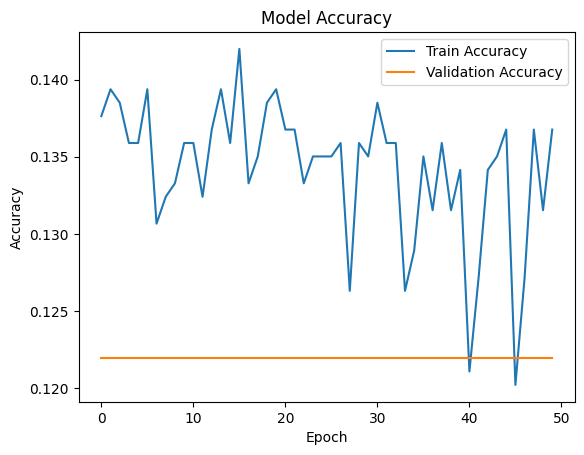

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* Test on an Audio File

In [38]:
feature = extract_features("data/Actor_01/03-01-03-01-01-01-01.wav")
prediction = model.predict(np.expand_dims(feature, axis=0))
predicted_emotion = le.inverse_transform([np.argmax(prediction)])
print("Predicted Emotion:", predicted_emotion[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Emotion: angry
